In [1]:
%load_ext autoreload 
%autoreload 2.

import os

try:
    os.chdir('./MantraNet')
except:
    pass

import matplotlib.pyplot as plt
import gc

from mantranet import *

from pytorch_lightning import Trainer


## I - How to use ManTraNet based on the pre-trained weights ?

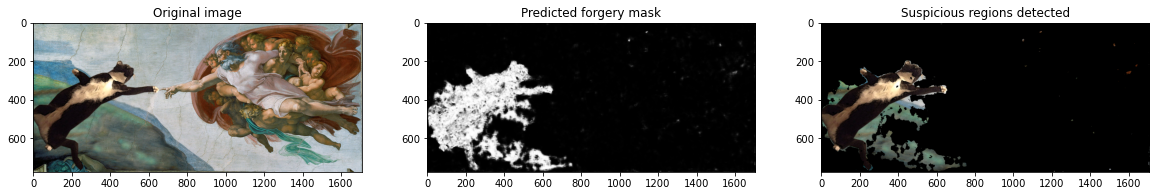

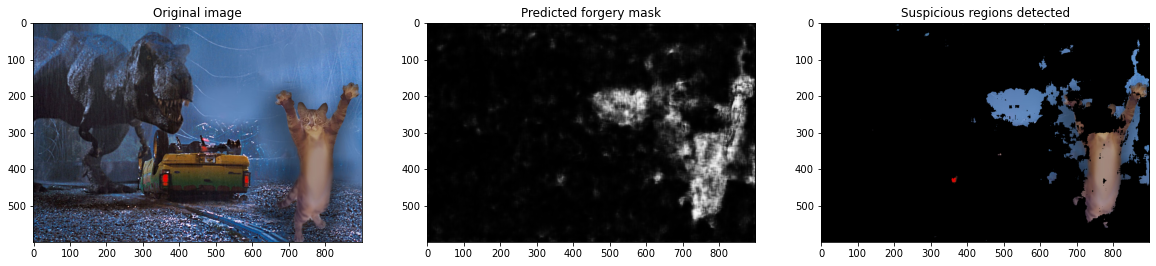

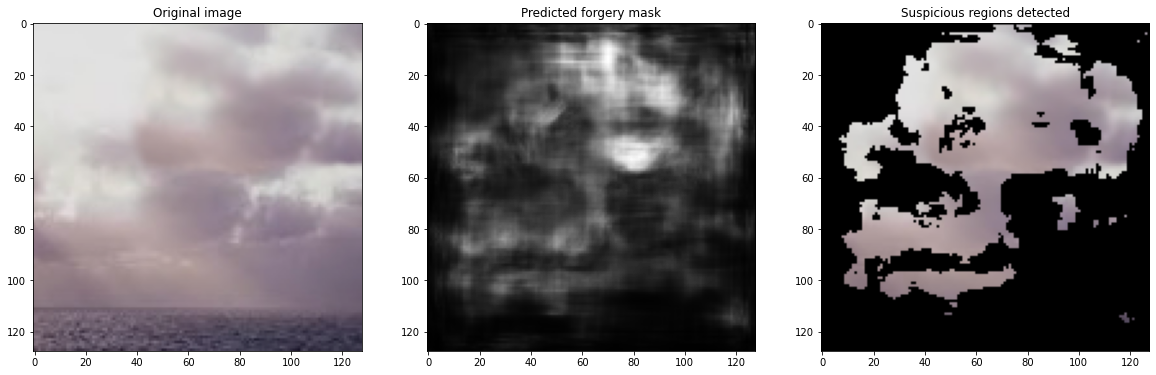

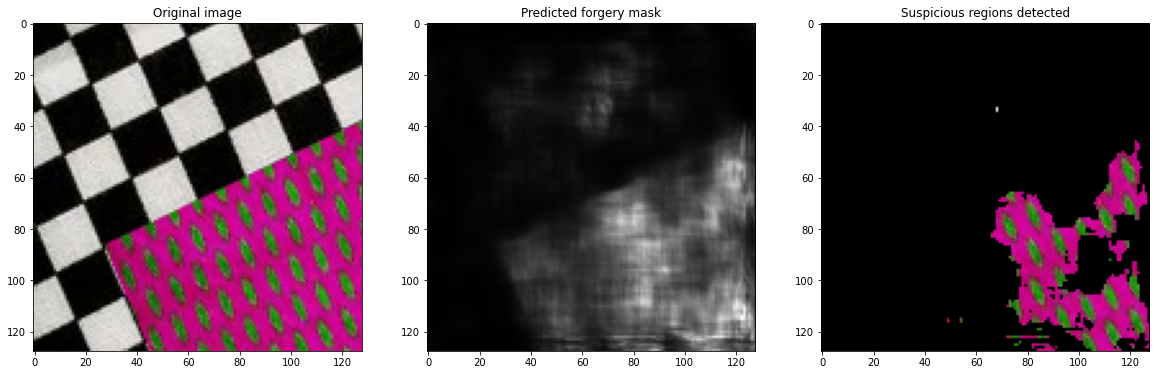

In [4]:
device='cpu' #to change if you have a GPU with at least 12Go RAM (it will save you a lot of time !)
model=pre_trained_model(weight_path='./MantraNetv4.pt',device=device)

for image in os.listdir('../Demo_images/'):

    plt.figure(figsize=(20,20))
    check_forgery(model,img_path=f'../Demo_images/{image}',device=device)

## II - How to train ManTraNet from the pre-trained weights ?

In [3]:
from torch.utils.data import TensorDataset,DataLoader

In [4]:
#creation of a random dataset of 10000 images of sizes 128x128
random_dataset=TensorDataset(torch.randn(10000,3,128,128),(torch.randn(10000,128,128)>0).type_as(torch.Tensor(0)))
random_dataloader=DataLoader(random_dataset,shuffle=True)

#pre-trained mantranet
mantranet=pre_trained_model(weight_path='./MantraNetv4.pt',device=device)

my_forgery_detector=ForgeryDetector(random_dataloader,detector=mantranet,lr=10**(-3))

In [ ]:
trainer = Trainer(gpus=1,max_epochs=10)

# launch the training
trainer.fit(my_forgery_detector)

trainer.save_checkpoint("my_current_model.ckpt")